In [1]:
import pandas as pd
import numpy as np
import random

In [69]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])
    
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
def heap_map_confusion_matrix(y_test,y_predict):
  
  confu_matrix=confusion_matrix(y_test, y_predict)
  plt.figure(figsize=(12, 10))
  sns.heatmap(confu_matrix,xticklabels= list(ACTIVITIES.values()), 
                yticklabels=list(ACTIVITIES.values()), 
                annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show() 

### Data

In [70]:
DATADIR = 'UCI_HAR_Dataset'

In [71]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [72]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 
    
    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [73]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [74]:

def load_y_raw(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return y

In [75]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [76]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [36]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=0,
    inter_op_parallelism_threads=0
)

In [37]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [77]:
# Importing libraries
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [78]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [79]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [80]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [81]:
timesteps = len(X_train_dy[0])
input_dim = len(X_train_dy[0][0])
n_classes = _count_classes(y_train_dy)

print(timesteps)
print(input_dim)
print(len(X_train_dy))

128
9
3285


- Defining the Architecture of LSTM

In [42]:
tf.keras.backend.clear_session()
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [44]:
# Training the model 75,0.25
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 75s 10ms/step - loss: 0.1018 - acc: 0.9591 - val_loss: 0.4606 - val_acc: 0.9155
Epoch 2/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.1012 - acc: 0.9596 - val_loss: 0.4761 - val_acc: 0.9114
Epoch 3/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.1076 - acc: 0.9550 - val_loss: 0.3617 - val_acc: 0.9114
Epoch 4/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.1050 - acc: 0.9570 - val_loss: 0.4742 - val_acc: 0.8955
Epoch 5/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.0997 - acc: 0.9592 - val_loss: 0.4303 - val_acc: 0.9111
Epoch 6/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.1176 - acc: 0.9544 - val_loss: 0.4276 - val_acc: 0.8938
Epoch 7/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.1169 - acc: 0.9516 - val_loss: 0.4459 - val_acc: 0.9070


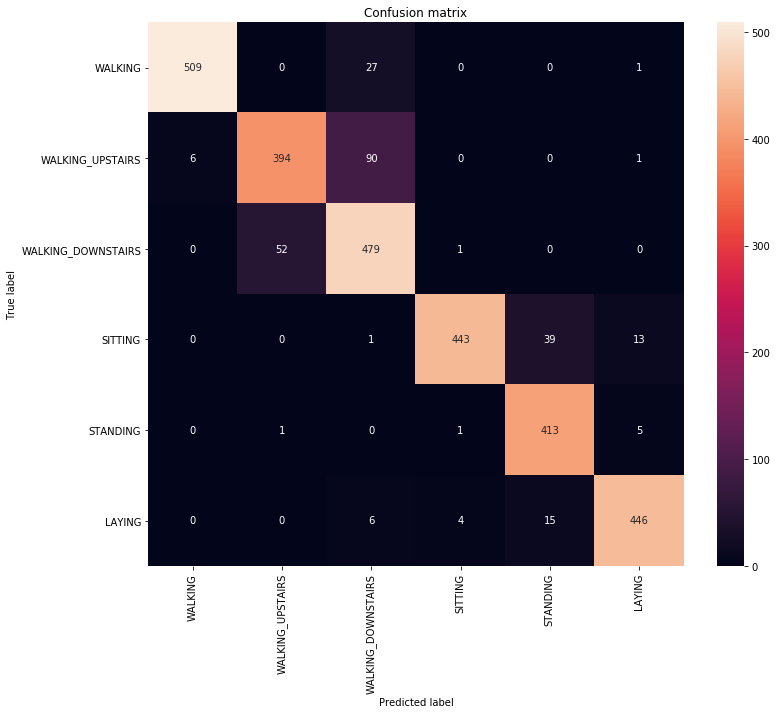

In [45]:
heap_map_confusion_matrix(Y_test, model.predict(X_test))

In [15]:
def lstm_model(rate,units):
  # Initiliazing the sequential model
  model = Sequential()
  # Configuring the parameters
  model.add(LSTM(units, input_shape=(timesteps, input_dim)))
  # Adding a dropout layer
  model.add(Dropout(rate))
  # Adding a dense output layer with sigmoid activation
  model.add(Dense(n_classes, activation='sigmoid'))
  # Compiling the model
  model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
  return model


In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
parameter={'units':[32,50,75,120],'rate':[0.25,0.5,0.75]}
model1=KerasClassifier(build_fn=lstm_model)
gs=GridSearchCV(estimator =model1,param_grid=parameter,return_train_score=True,verbose=1)
gs.fit(X_train,Y_train,epochs=30)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
4901/4901 [==============================] - 12s 2ms/step - loss: 1.4265 - acc: 0.4181
Epoch 2/30
4901/4901 [==============================] - 11s 2ms/step - loss: 1.1626 - acc: 0.5107
Epoch 3/30
4901/4901 [==============================] - 11s 2ms/step - loss: 0.9929 - acc: 0.5262
Epoch 4/30
4901/4901 [==============================] - 11s 2ms/step - loss: 0.8734 - acc: 0.6289
Epoch 5/30
4901/4901 [==============================] - 11s 2ms/step - loss: 0.8140 - acc: 0.6384
Epoch 6/30
4901/4901 [==============================] - 11s 2ms/step - loss: 0.7311 - acc: 0.6539
Epoch 7/30
4901/4901 [==============================] - 11s 2ms/step - loss: 0.6708 - acc: 0.6784
Epoch 8/30
4901/4901 [==============================] - 11s 2ms/step - loss: 0.6504 - acc: 0.6725
Epoch 9/30
4901/4901 [==============================]

4902/4902 [==============================] - 11s 2ms/step - loss: 0.8935 - acc: 0.6269
Epoch 5/30
4902/4902 [==============================] - 11s 2ms/step - loss: 0.8217 - acc: 0.6393
Epoch 6/30
4902/4902 [==============================] - 11s 2ms/step - loss: 0.7354 - acc: 0.6767
Epoch 7/30
4902/4902 [==============================] - 11s 2ms/step - loss: 0.6563 - acc: 0.7295
Epoch 8/30
4902/4902 [==============================] - 11s 2ms/step - loss: 0.5927 - acc: 0.7485
Epoch 9/30
4902/4902 [==============================] - 11s 2ms/step - loss: 0.5506 - acc: 0.8005
Epoch 10/30
4902/4902 [==============================] - 11s 2ms/step - loss: 0.4536 - acc: 0.8515
Epoch 11/30
4902/4902 [==============================] - 11s 2ms/step - loss: 0.3819 - acc: 0.8835
Epoch 12/30
4902/4902 [==============================] - 11s 2ms/step - loss: 0.3435 - acc: 0.8882
Epoch 13/30
4902/4902 [==============================] - 11s 2ms/step - loss: 0.2888 - acc: 0.9031
Epoch 14/30
4902/4902 [====

4901/4901 [==============================] - 17s 3ms/step - loss: 0.2180 - acc: 0.9288
Epoch 14/30
4901/4901 [==============================] - 17s 3ms/step - loss: 0.2023 - acc: 0.9314
Epoch 15/30
4901/4901 [==============================] - 17s 3ms/step - loss: 0.2007 - acc: 0.9314
Epoch 16/30
4901/4901 [==============================] - 17s 3ms/step - loss: 0.1730 - acc: 0.9455
Epoch 17/30
4901/4901 [==============================] - 17s 3ms/step - loss: 0.1671 - acc: 0.9416
Epoch 18/30
4901/4901 [==============================] - 17s 3ms/step - loss: 0.1402 - acc: 0.9504
Epoch 19/30
4901/4901 [==============================] - 17s 3ms/step - loss: 0.1381 - acc: 0.9508
Epoch 20/30
4901/4901 [==============================] - 17s 3ms/step - loss: 0.1492 - acc: 0.9457
Epoch 21/30
4901/4901 [==============================] - 17s 3ms/step - loss: 0.1415 - acc: 0.9482
Epoch 22/30
4901/4901 [==============================] - 17s 3ms/step - loss: 0.1292 - acc: 0.9480
Epoch 23/30
4901/4901 

4901/4901 [==============================] - 12s 3ms/step - loss: 0.2995 - acc: 0.9082
Epoch 23/30
4901/4901 [==============================] - 12s 2ms/step - loss: 0.2095 - acc: 0.9263
Epoch 24/30
4901/4901 [==============================] - 12s 2ms/step - loss: 0.1962 - acc: 0.9355
Epoch 25/30
4901/4901 [==============================] - 12s 2ms/step - loss: 0.1833 - acc: 0.9363
Epoch 26/30
4901/4901 [==============================] - 12s 2ms/step - loss: 0.1903 - acc: 0.9339
Epoch 27/30
4901/4901 [==============================] - 12s 2ms/step - loss: 0.2292 - acc: 0.9243
Epoch 28/30
4901/4901 [==============================] - 12s 2ms/step - loss: 0.1742 - acc: 0.9402
Epoch 29/30
4901/4901 [==============================] - 12s 2ms/step - loss: 0.1855 - acc: 0.9351
Epoch 30/30
4901/4901 [==============================] - 2s 498us/step
Epoch 1/30
4901/4901 [==============================] - 15s 3ms/step - loss: 1.4099 - acc: 0.4040
Epoch 2/30
4901/4901 [=============================

4902/4902 [==============================] - 3s 681us/step
Epoch 1/30
4901/4901 [==============================] - 21s 4ms/step - loss: 1.3418 - acc: 0.4273
Epoch 2/30
4901/4901 [==============================] - 17s 4ms/step - loss: 1.0938 - acc: 0.5193
Epoch 3/30
4901/4901 [==============================] - 17s 4ms/step - loss: 1.0448 - acc: 0.5546
Epoch 4/30
4901/4901 [==============================] - 17s 4ms/step - loss: 1.0509 - acc: 0.5134
Epoch 5/30
4901/4901 [==============================] - 17s 4ms/step - loss: 0.9704 - acc: 0.5754: 0s - loss: 0.9717 - acc: 0.5
Epoch 6/30
4901/4901 [==============================] - 17s 4ms/step - loss: 0.7481 - acc: 0.6719
Epoch 7/30
4901/4901 [==============================] - 17s 4ms/step - loss: 0.6786 - acc: 0.7129
Epoch 8/30
4901/4901 [==============================] - 17s 4ms/step - loss: 0.6225 - acc: 0.7629
Epoch 9/30
4901/4901 [==============================] - 17s 4ms/step - loss: 0.5587 - acc: 0.8004
Epoch 10/30
4901/4901 [======

4902/4902 [==============================] - 18s 4ms/step - loss: 0.1897 - acc: 0.9343
Epoch 20/30
4902/4902 [==============================] - 18s 4ms/step - loss: 0.1827 - acc: 0.9349
Epoch 21/30
4902/4902 [==============================] - 18s 4ms/step - loss: 0.1678 - acc: 0.9382
Epoch 22/30
4902/4902 [==============================] - 18s 4ms/step - loss: 0.1877 - acc: 0.9286
Epoch 23/30
4902/4902 [==============================] - 18s 4ms/step - loss: 0.1695 - acc: 0.9378
Epoch 24/30
4902/4902 [==============================] - 18s 4ms/step - loss: 0.1697 - acc: 0.9404
Epoch 25/30
4902/4902 [==============================] - 17s 4ms/step - loss: 0.1880 - acc: 0.9292
Epoch 26/30
4902/4902 [==============================] - 18s 4ms/step - loss: 0.1587 - acc: 0.9433
Epoch 27/30
4902/4902 [==============================] - 18s 4ms/step - loss: 0.1285 - acc: 0.9484
Epoch 28/30
4902/4902 [==============================] - 18s 4ms/step - loss: 0.1434 - acc: 0.9423
Epoch 29/30
4902/4902 

4901/4901 [==============================] - 12s 2ms/step - loss: 0.2374 - acc: 0.9353
Epoch 29/30
4901/4901 [==============================] - 12s 2ms/step - loss: 0.2488 - acc: 0.9302
Epoch 30/30
4901/4901 [==============================] - 2s 497us/step
Epoch 1/30
4902/4902 [==============================] - 18s 4ms/step - loss: 1.4234 - acc: 0.3900
Epoch 2/30
4902/4902 [==============================] - 12s 3ms/step - loss: 1.2556 - acc: 0.4621
Epoch 3/30
4902/4902 [==============================] - 12s 3ms/step - loss: 1.1571 - acc: 0.4792
Epoch 4/30
4902/4902 [==============================] - 12s 3ms/step - loss: 1.1203 - acc: 0.4843
Epoch 5/30
4902/4902 [==============================] - 12s 3ms/step - loss: 1.0627 - acc: 0.5014
Epoch 6/30
4902/4902 [==============================] - 12s 3ms/step - loss: 1.0073 - acc: 0.5182
Epoch 7/30
4902/4902 [==============================] - 12s 3ms/step - loss: 0.9263 - acc: 0.5730
Epoch 8/30
4902/4902 [==============================] - 1

4901/4901 [==============================] - 6s 1ms/step
Epoch 1/30
4901/4901 [==============================] - 25s 5ms/step - loss: 1.4024 - acc: 0.3926
Epoch 2/30
4901/4901 [==============================] - 19s 4ms/step - loss: 1.2368 - acc: 0.4422
Epoch 3/30
4901/4901 [==============================] - 19s 4ms/step - loss: 1.1199 - acc: 0.5042
Epoch 4/30
4901/4901 [==============================] - 19s 4ms/step - loss: 1.0105 - acc: 0.5578
Epoch 5/30
4901/4901 [==============================] - 19s 4ms/step - loss: 0.8677 - acc: 0.5970
Epoch 6/30
4901/4901 [==============================] - 19s 4ms/step - loss: 0.8248 - acc: 0.6142
Epoch 7/30
4901/4901 [==============================] - 19s 4ms/step - loss: 0.7465 - acc: 0.6303
Epoch 8/30
4901/4901 [==============================] - 19s 4ms/step - loss: 0.7123 - acc: 0.6572
Epoch 9/30
4901/4901 [==============================] - 19s 4ms/step - loss: 0.7893 - acc: 0.6597
Epoch 10/30
4901/4901 [==============================] - 19s 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 248.8min finished


Epoch 1/30
7352/7352 [==============================] - 36s 5ms/step - loss: 1.3193 - acc: 0.4177
Epoch 2/30
7352/7352 [==============================] - 29s 4ms/step - loss: 1.0762 - acc: 0.5007
Epoch 3/30
7352/7352 [==============================] - 29s 4ms/step - loss: 1.0878 - acc: 0.5275
Epoch 4/30
7352/7352 [==============================] - 29s 4ms/step - loss: 0.8150 - acc: 0.5981
Epoch 5/30
7352/7352 [==============================] - 29s 4ms/step - loss: 0.6970 - acc: 0.6396
Epoch 6/30
7352/7352 [==============================] - 29s 4ms/step - loss: 0.6286 - acc: 0.7040
Epoch 7/30
7352/7352 [==============================] - 29s 4ms/step - loss: 0.5214 - acc: 0.7867
Epoch 8/30
7352/7352 [==============================] - 29s 4ms/step - loss: 0.3840 - acc: 0.8700
Epoch 9/30
7352/7352 [==============================] - 29s 4ms/step - loss: 0.3223 - acc: 0.8953
Epoch 10/30
7352/7352 [==============================] - 29s 4ms/step - loss: 0.2747 - acc: 0.8977
Epoch 11/30
7352/73

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000000102F2217F0>,
             iid='warn', n_jobs=None,
             param_grid={'rate': [0.25, 0.5, 0.75], 'units': [32, 50, 75, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [17]:
results2=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')
results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rate,param_units,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,527.647625,6.007313,4.234099,0.108445,0.5,120,"{'rate': 0.5, 'units': 120}",0.940840,0.912689,0.920816,0.924782,0.011831,1,0.957152,0.963885,0.954712,0.958583,0.003879
11,575.242887,4.367187,5.435952,0.105066,0.75,120,"{'rate': 0.75, 'units': 120}",0.931457,0.909017,0.933061,0.924510,0.010976,2,0.939196,0.954091,0.924521,0.939269,0.012072
3,505.279724,2.539347,3.154789,0.078219,0.25,120,"{'rate': 0.25, 'units': 120}",0.944512,0.886577,0.926122,0.919070,0.024173,3,0.946337,0.954907,0.963688,0.954978,0.007084
0,321.903135,3.703575,1.174702,0.029534,0.25,32,"{'rate': 0.25, 'units': 32}",0.940432,0.875153,0.924898,0.913493,0.027845,4,0.933483,0.939604,0.950632,0.941240,0.007096
6,399.889164,1.962008,3.039253,0.063813,0.5,75,"{'rate': 0.5, 'units': 75}",0.931865,0.884129,0.920408,0.912133,0.020348,5,0.941849,0.955723,0.952672,0.950081,0.005953
1,340.882094,3.834282,1.465524,0.056561,0.25,50,"{'rate': 0.25, 'units': 50}",0.911873,0.896369,0.905306,0.904516,0.006354,6,0.940828,0.961845,0.938800,0.947158,0.010418
5,358.696543,3.870178,2.351838,0.045211,0.5,50,"{'rate': 0.5, 'units': 50}",0.926969,0.846185,0.912653,0.895267,0.035198,7,0.930014,0.946133,0.947164,0.941104,0.007853
4,333.774160,1.760431,1.961462,0.055249,0.5,32,"{'rate': 0.5, 'units': 32}",0.906161,0.875153,0.856327,0.879217,0.020546,8,0.943685,0.944297,0.945124,0.944369,0.000590
2,379.636419,2.948856,2.107200,0.050675,0.25,75,"{'rate': 0.25, 'units': 75}",0.935537,0.759282,0.911429,0.868743,0.078032,9,0.944909,0.877372,0.946960,0.923081,0.032332
9,376.254098,4.405062,3.302417,0.075248,0.75,50,"{'rate': 0.75, 'units': 50}",0.655243,0.871481,0.870612,0.799102,0.101735,10,0.668435,0.945929,0.934313,0.849559,0.128162


In [24]:
tf.keras.backend.clear_session()
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(75, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.25))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 75)                25500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 456       
Total params: 25,956
Trainable params: 25,956
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:

model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 46s 6ms/step - loss: 1.2742 - acc: 0.4457 - val_loss: 1.0340 - val_acc: 0.5779
Epoch 2/30
7352/7352 [==============================] - 45s 6ms/step - loss: 0.9959 - acc: 0.5635 - val_loss: 0.8613 - val_acc: 0.6189
Epoch 3/30
7352/7352 [==============================] - 45s 6ms/step - loss: 0.8477 - acc: 0.6212 - val_loss: 0.8045 - val_acc: 0.6284
Epoch 4/30
7352/7352 [==============================] - 45s 6ms/step - loss: 0.6366 - acc: 0.7225 - val_loss: 0.6710 - val_acc: 0.7835
Epoch 5/30
7352/7352 [==============================] - 45s 6ms/step - loss: 0.4576 - acc: 0.8338 - val_loss: 0.7840 - val_acc: 0.7808
Epoch 6/30
7352/7352 [==============================] - 45s 6ms/step - loss: 0.3271 - acc: 0.8864 - val_loss: 0.4474 - val_acc: 0.8541
Epoch 7/30
7352/7352 [==============================] - 46s 6ms/step - loss: 0.2709 - acc: 0.9

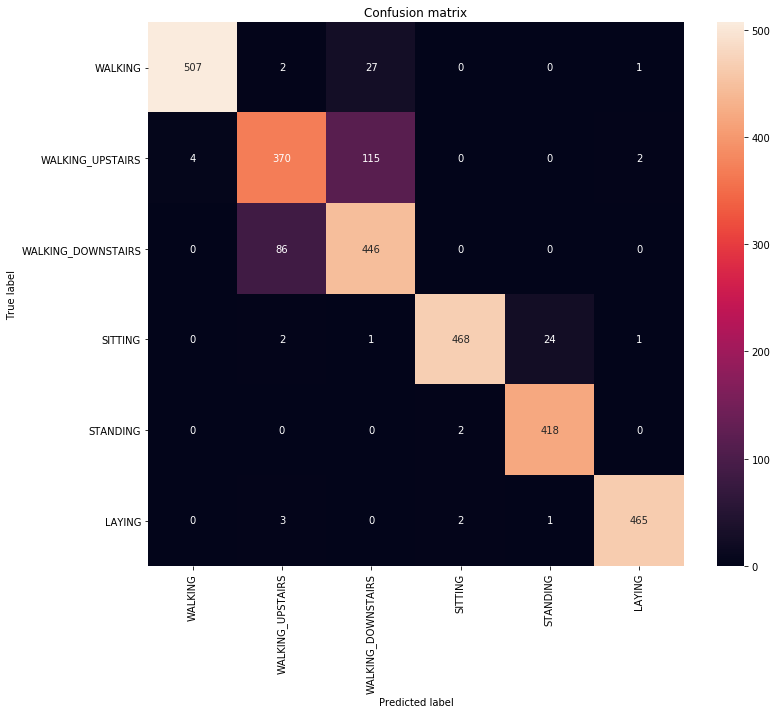

In [48]:
heap_map_confusion_matrix(Y_test, model.predict(X_test))

In [51]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 2s 606us/step


In [52]:
score

[0.4251796115343771, 0.9073634204275535]

1. Even after doing hyper parameter tuning, could not get accuracy more than 96%.
2. 91.69% accuracy got if I choose 72 LSTM units and dropout rate=0.25,because we have less data point model is over fining.
3. Train accuracy is 95.23% and test accuracy is 97.69% there is huge gap between train and test accuracy we can conclude that model is overfitting.

<H2> Model with 2 LSTM layers 

LSTM(75)->dropout(0.1)->LSTM(32)->dropout(0.1)->dense(6)

In [28]:
tf.keras.backend.clear_session()
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(75,return_sequences=True, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model1.add(Dropout(0.1))
model1.add(LSTM(32, input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.1))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 75)           25500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 75)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                13824     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 39,522
Trainable params: 39,522
Non-trainable params: 0
_________________

In [29]:
# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
# Training the model 75,0.1,32,.01
model1.fit(X_train,Y_train, batch_size=22, validation_data=(X_test, Y_test), epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 59s 8ms/step - loss: 1.2147 - acc: 0.4781 - val_loss: 1.0385 - val_acc: 0.5582
Epoch 2/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.8280 - acc: 0.6336 - val_loss: 0.8380 - val_acc: 0.6624
Epoch 3/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.7065 - acc: 0.6813 - val_loss: 0.9908 - val_acc: 0.6532
Epoch 4/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.6230 - acc: 0.7452 - val_loss: 0.6537 - val_acc: 0.7577
Epoch 5/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.4110 - acc: 0.8715 - val_loss: 0.4141 - val_acc: 0.8558
Epoch 6/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.2679 - acc: 0.9161 - val_loss: 0.3714 - val_acc: 0.8738
Epoch 7/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.2258 - acc: 0.9

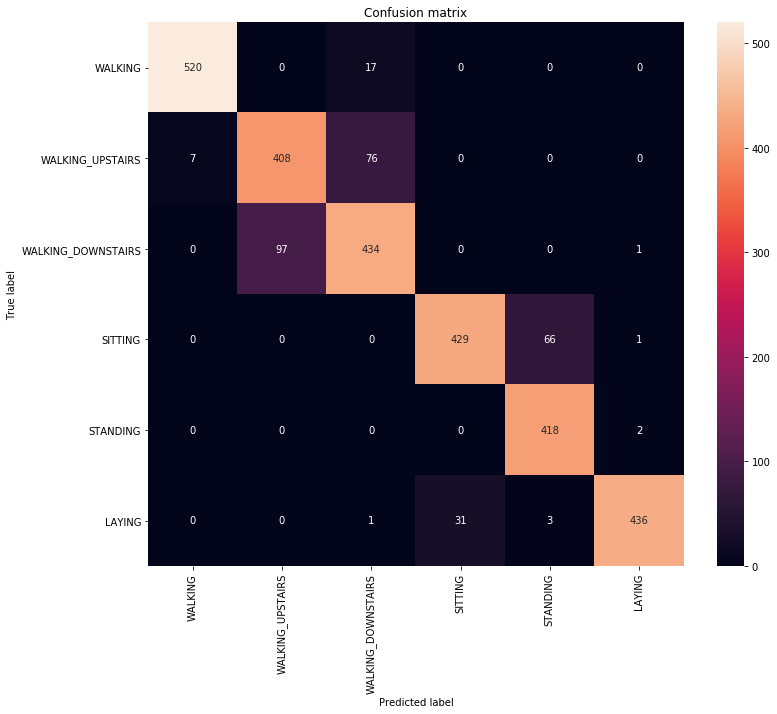

In [31]:
heap_map_confusion_matrix(Y_test, model1.predict(X_test))

LSTM(50)->dropout(0.1)->LSTM(32)->dropout(0.1)->dense(6)

In [32]:
tf.keras.backend.clear_session()
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(50,return_sequences=True, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model1.add(Dropout(0.1))
model1.add(LSTM(32, input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.1))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 50)           12000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 22,822
Trainable params: 22,822
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
#model 50,32
model1.fit(X_train,Y_train, batch_size=22, validation_data=(X_test, Y_test), epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 58s 8ms/step - loss: 0.1114 - acc: 0.9570 - val_loss: 0.4864 - val_acc: 0.8989
Epoch 2/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.1101 - acc: 0.9563 - val_loss: 0.5089 - val_acc: 0.8890
Epoch 3/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.1352 - acc: 0.9532 - val_loss: 0.5561 - val_acc: 0.8700
Epoch 4/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.1140 - acc: 0.9554 - val_loss: 0.4189 - val_acc: 0.9131
Epoch 5/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.1220 - acc: 0.9543 - val_loss: 0.4250 - val_acc: 0.9172
Epoch 6/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.1156 - acc: 0.9558 - val_loss: 0.4545 - val_acc: 0.9002
Epoch 7/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.1219 - acc: 0.9554 - val_loss: 0.4923 - val_acc: 0.9046
Epoch 8

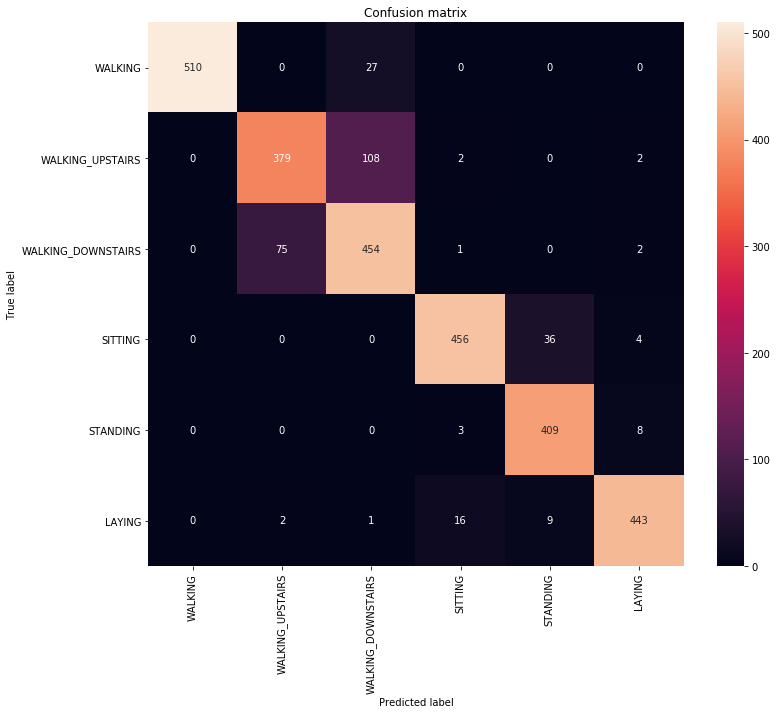

In [36]:
heap_map_confusion_matrix(Y_test, model1.predict(X_test))

LSTM(32)->dropout(0.1)->LSTM(15)->dropout(0.1)->dense(6)

In [37]:
tf.keras.backend.clear_session()
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(32,return_sequences=True, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model1.add(Dropout(0.1))
model1.add(LSTM(15, input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.1))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 15)                2880      
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 96        
Total params: 8,352
Trainable params: 8,352
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
#model 32,15
model1.fit(X_train,Y_train, batch_size=22, validation_data=(X_test, Y_test), epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 58s 8ms/step - loss: 0.1158 - acc: 0.9546 - val_loss: 0.5083 - val_acc: 0.9023
Epoch 2/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.1086 - acc: 0.9584 - val_loss: 0.4791 - val_acc: 0.9063
Epoch 3/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.1115 - acc: 0.9557 - val_loss: 0.4457 - val_acc: 0.9145
Epoch 4/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.1062 - acc: 0.9588 - val_loss: 0.4386 - val_acc: 0.9203
Epoch 5/30
7352/7352 [==============================] - 58s 8ms/step - loss: 0.0980 - acc: 0.9612 - val_loss: 0.4654 - val_acc: 0.9203
Epoch 6/30
7352/7352 [==============================] - 59s 8ms/step - loss: 0.0988 - acc: 0.9600 - val_loss: 0.5513 - val_acc: 0.9077
Epoch 7/30
7352/7352 [==============================] - 59s 8ms/step - loss: 0.0996 - acc: 0.9600 - val_loss: 0.4583 - val_acc: 0.9175
Epoch 8

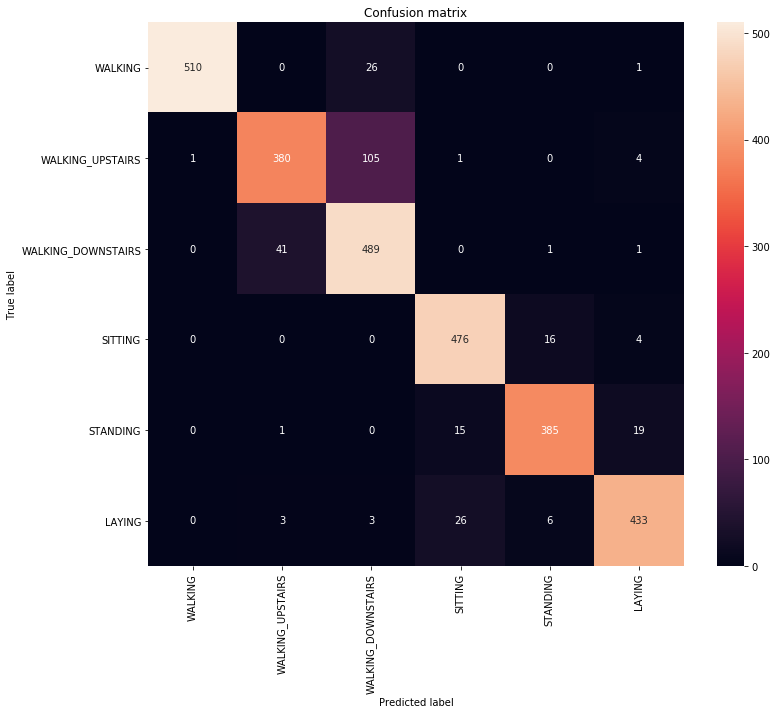

In [40]:
heap_map_confusion_matrix(Y_test, model1.predict(X_test))

In [1]:
import prettytable

table=prettytable.PrettyTable()

table.field_names=['Model','Layer 1 units','Layer 2 units','keepprob','accuracy']

table.add_row(['1 layer','32','_','0.5','91.08'])
table.add_row(['1 layer','72','_','0.25','91.28'])
table.add_row(['2 layer','75','32','0.1','89.75'])
table.add_row(['2 layer','50','32','0.1','89.96'])
table.add_row(['2 layer','32','15','0.1','90.70'])


print(table)


+---------+---------------+---------------+----------+----------+
|  Model  | Layer 1 units | Layer 2 units | keepprob | accuracy |
+---------+---------------+---------------+----------+----------+
| 1 layer |       32      |       _       |   0.5    |  91.08   |
| 1 layer |       72      |       _       |   0.25   |  91.28   |
| 2 layer |       75      |       32      |   0.1    |  89.75   |
| 2 layer |       50      |       32      |   0.1    |  89.96   |
| 2 layer |       32      |       15      |   0.1    |  90.70   |
+---------+---------------+---------------+----------+----------+


1. Even after doing hyper parameter tuning, could not get accuracy more than 96%.
2. 91.69% accuracy got if I choose 72 LSTM units and dropout rate=0.25,because we have less data point model is over fining.
3. Train accuracy is 95.23% and test accuracy is 97.69% there is huge gap between train and test accuracy we can conclude that model is overfitting.
4. For two layer model again accuracy is low because we have less data point and more number of wieghts to be adjust

<H3> divide and conquer cnn 

In [2]:
# Importing libraries
from keras.regularizers import l2
import tensorflow as tf
# Importing libraries
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
import keras

# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperas.utils import eval_hyperopt_space
import pandas as pd
import numpy as np
import random

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax,tit, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation")
    ax.plot(x, ty, 'r', label="Train")
    plt.legend()
    plt.grid()
    plt.title(tit)
    plt.show()
    #fig.canvas.draw()

<h3>classifying the data into static actives and dynamic actives

In [3]:
import pickle
from sklearn.preprocessing import StandardScaler
def data_data_2():
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"]
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []
        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append(_read_csv(filename).as_matrix()) 
    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    def load_data():
        
        """
        Obtain the dataset from multiple files.
         Returns: X_train, X_test, y_train, y_test
         """
        X_train, X_test = load_signals('train'), load_signals('test')
        y_train, y_test = load_y_raw('train'), load_y_raw('test')
        return X_train, X_test, y_train, y_test
    from sklearn.base import BaseEstimator, TransformerMixin
    class scaling_tseries_data(BaseEstimator, TransformerMixin):
        from sklearn.preprocessing import StandardScaler
        def __init__(self):
            self.scale = None

        def transform(self, X):
            temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
            temp_X1 = self.scale.transform(temp_X1)
            return temp_X1.reshape(X.shape)

        def fit(self, X):
            # remove overlaping
            remove = int(X.shape[1] / 2)
            temp_X = X[:, -remove:, :]
            # flatten data
            temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
            scale = StandardScaler()
            scale.fit(temp_X)
            pickle.dump(scale,open('act.p','wb'))
            self.scale = scale
            return self
    def load_y_2(subset):
        
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
         that represents a human activity. We return a binary representation of 
         every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
         """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        y[y<=3] = 0
        y[y>3] = 1
        return pd.get_dummies(y).as_matrix()
        
    Y_train_2 = load_y_2('train')
    Y_test_2 = load_y_2('test')
    X_train_2, X_test_2 = load_signals('train'), load_signals('test')
       
    Scale = scaling_tseries_data()
    Scale.fit(X_train_2)
    X_train_2 = Scale.transform(X_train_2)
    X_test_2 = Scale.transform(X_test_2)
    return X_train_2,Y_train_2,X_test_2,Y_test_2

In [4]:
X_train_2, Y_train_2, X_test_2,  Y_test_2 = data_data_2()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [5]:
print(X_train_2.shape, Y_train_2.shape, X_test_2.shape,  Y_test_2.shape)

(7352, 128, 9) (7352, 2) (2947, 128, 9) (2947, 2)


In [6]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(LSTM(32,return_sequences=True, input_shape=(128,9)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 126, 32)           3104      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 124, 32)           3104      
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)  

In [7]:
adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X_train_2, Y_train_2, epochs=20, batch_size=16,validation_data=(X_test_2,  Y_test_2), verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/20
 - 37s - loss: 0.0234 - acc: 0.9909 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 2/20
 - 37s - loss: 5.7630e-05 - acc: 1.0000 - val_loss: 4.6614e-04 - val_acc: 1.0000
Epoch 3/20
 - 36s - loss: 2.0547e-05 - acc: 1.0000 - val_loss: 2.0638e-04 - val_acc: 1.0000
Epoch 4/20
 - 36s - loss: 5.2724e-06 - acc: 1.0000 - val_loss: 2.2171e-04 - val_acc: 1.0000
Epoch 5/20
 - 35s - loss: 0.0044 - acc: 0.9992 - val_loss: 0.0039 - val_acc: 0.9993
Epoch 6/20
 - 35s - loss: 0.0018 - acc: 0.9999 - val_loss: 6.1709e-04 - val_acc: 1.0000
Epoch 7/20
 - 35s - loss: 5.9105e-05 - acc: 1.0000 - val_loss: 5.2428e-04 - val_acc: 1.0000
Epoch 8/20
 - 35s - loss: 0.0064 - acc: 0.9990 - val_loss: 0.0937 - val_acc: 0.9915
Epoch 9/20
 - 35s - loss: 0.0059 - acc: 0.9992 - val_loss: 0.0021 - val_acc: 0.9993
Epoch 10/20
 - 35s - loss: 0.0025 - acc: 0.9997 - val_loss: 0.0023 - val_acc: 0.9990
Epoch 11/20
 - 35s - loss: 

In [8]:

model.evaluate(X_test_2,  Y_test_2)

2947/2947 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 585us/step


[0.002347592716254783, 0.998642687478792]

In [9]:
model.save('model_class_2_lstm.h5')

In [10]:
from keras.models import load_model
model=load_model('model_class_2.h5')
model.evaluate(X_test_2,  Y_test_2)

2947/2947 [==============================] - ETA: 13 - ETA: 1 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 188us/step


[0.008060890691714543, 0.9989820156090939]

<h3>ccn to classify static activities

In [16]:
import pickle
from sklearn.preprocessing import StandardScaler

def data_data_st():
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"]
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []
        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append(_read_csv(filename).as_matrix()) 
    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    def load_data():
        
        """
        Obtain the dataset from multiple files.
         Returns: X_train, X_test, y_train, y_test
         """
        X_train, X_test = load_signals('train'), load_signals('test')
        y_train, y_test = load_y_raw('train'), load_y_raw('test')
        return X_train, X_test, y_train, y_test
    def load_y_st(subset):
        
        
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
         that represents a human activity. We return a binary representation of 
         every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
         """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        y_subset = y>3
        y = y[y_subset]
        return pd.get_dummies(y).as_matrix(),y_subset
    from sklearn.base import BaseEstimator, TransformerMixin
    class scaling_tseries_data(BaseEstimator, TransformerMixin):
        from sklearn.preprocessing import StandardScaler
        def __init__(self):
            self.scale = None

        def transform(self, X):
            temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
            temp_X1 = self.scale.transform(temp_X1)
            return temp_X1.reshape(X.shape)

        def fit(self, X):
            # remove overlaping
            remove = int(X.shape[1] / 2)
            temp_X = X[:, -remove:, :]
            # flatten data
            temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
            scale = StandardScaler()
            scale.fit(temp_X)
            pickle.dump(scale,open('static.p','wb'))
            self.scale = scale
            return self   
    Y_train_st,y_train_sub = load_y_st('train')
    Y_test_st,y_test_sub = load_y_st('test')
    X_train_st, X_test_st = load_signals('train'), load_signals('test')
    X_train_st = X_train_st[y_train_sub]
    X_test_st = X_test_st[y_test_sub]
    
    Scale = scaling_tseries_data()
    Scale.fit(X_train_st)
    X_train_st = Scale.transform(X_train_st)
    X_test_st = Scale.transform(X_test_st)
    
    return X_train_st,Y_train_st,X_test_st,Y_test_st


In [17]:
X_train_st,Y_train_st,X_test_st,Y_test_st= data_data_st()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [6]:
tf.keras.backend.clear_session()
model_st = Sequential()
model_st.add(LSTM(32,return_sequences=True, input_shape=(128,9)))
model_st.add(Conv1D(filters=64, kernel_size=7, activation='relu',kernel_initializer='he_uniform'))
model_st.add(Conv1D(filters=64, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model_st.add(Dropout(0.6))
model_st.add(MaxPooling1D(pool_size=3))
model_st.add(Flatten())
model_st.add(Dense(16, activation='relu'))
model_st.add(Dense(3, activation='softmax'))
model_st.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 64)           14400     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 120, 64)           12352     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 40, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)  

In [7]:
adam = keras.optimizers.Adam(lr=0.004)
model_st.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
result = model_st.fit(X_train_st, Y_train_st,
              batch_size=64,
              nb_epoch=30,
              verbose=2,
              validation_data=(X_test_st,  Y_test_st))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Instructions for updating:
Use tf.cast instead.
Train on 4067 samples, validate on 1560 samples
Epoch 1/30
 - 10s - loss: 0.3057 - acc: 0.8692 - val_loss: 0.2833 - val_acc: 0.8904
Epoch 2/30
 - 9s - loss: 0.1861 - acc: 0.9248 - val_loss: 0.2297 - val_acc: 0.9224
Epoch 3/30
 - 9s - loss: 0.1495 - acc: 0.9412 - val_loss: 0.1920 - val_acc: 0.9385
Epoch 4/30
 - 9s - loss: 0.1418 - acc: 0.9471 - val_loss: 0.1611 - val_acc: 0.9455
Epoch 5/30
 - 9s - loss: 0.1315 - acc: 0.9457 - val_loss: 0.1533 - val_acc: 0.9340
Epoch 6/30
 - 9s - loss: 0.1144 - acc: 0.9575 - val_loss: 0.1474 - val_acc: 0.9526
Epoch 7/30
 - 9s - loss: 0.1577 - acc: 0.9521 - val_loss: 0.1669 - val_acc: 0.9256
Epoch 8/30
 - 9s - loss: 0.1171 - acc: 0.9575 - val_loss: 0.1471 - val_acc: 0.9404
Epoch 9/30
 - 9s - loss: 0.0824 - acc: 0.9683 - val_loss: 0.1230 - val_acc: 0.9538
Epoch 10/30
 - 9s - loss: 0.0785 - acc: 0.9688 - val_loss: 0.1315 - val_acc: 0.9558
Epoch 11/30
 - 9s - loss: 0.0612 - acc: 0.9766 - val_loss: 0.1283 - val_

In [8]:
#saving model
model_st.save('model_class_static_best_lstm.h5')

<IPython.core.display.Javascript object>


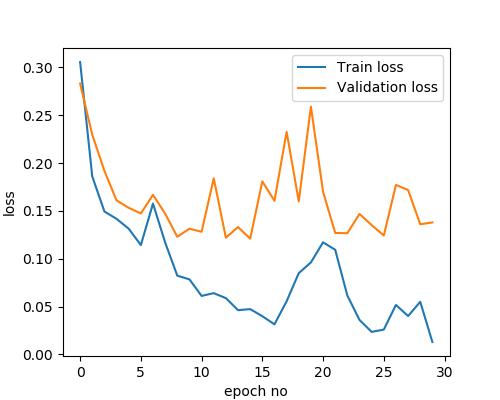

In [9]:
plt.figure(figsize=(5,4))
plt.plot(result.history['loss'],label='Train loss')
plt.plot(result.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


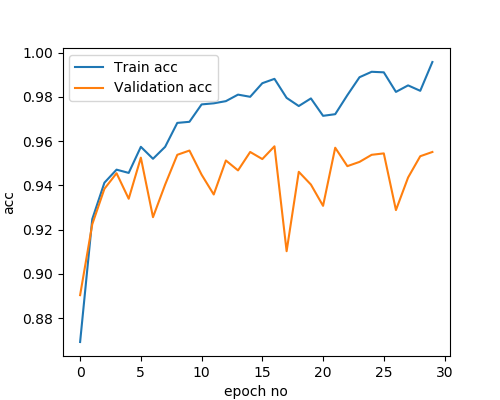

In [10]:
plt.figure(figsize=(5,4))
plt.plot(result.history['acc'],label='Train acc')
plt.plot(result.history['val_acc'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()

In [19]:
from keras.models import load_model
from tensorflow import Graph, Session
graph1 = Graph()
with graph1.as_default():
    session1 = Session()
    with session1.as_default():
        # load model
        model1 = load_model("model_class_static_best_lstm.h5")
        output1 = model1.predict(X_test_st)
        session1.close()

In [20]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {

    0: 'SITTING',
    1: 'STANDING',
    2: 'LAYING',
}

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])
    
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
def heap_map_confusion_matrix(y_test,y_predict):
  
  confu_matrix=confusion_matrix(y_test, y_predict)
  plt.figure(figsize=(12, 10))
  sns.heatmap(confu_matrix,xticklabels= list(ACTIVITIES.values()), 
                yticklabels=list(ACTIVITIES.values()), 
                annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show() 

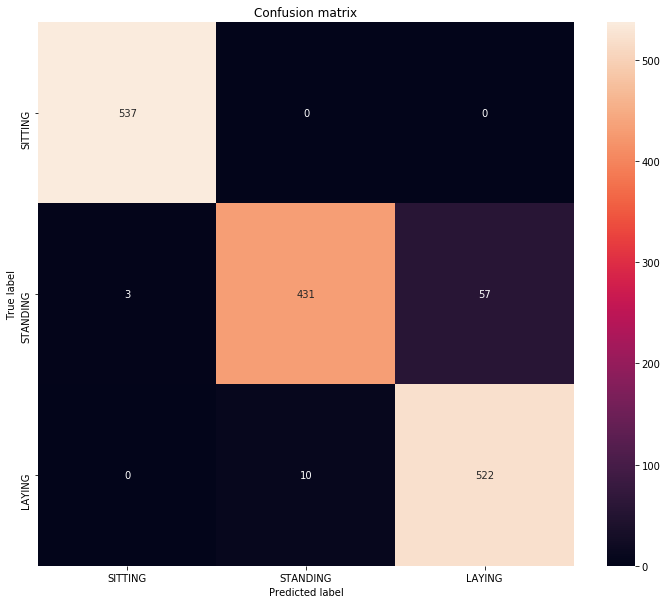

In [21]:
heap_map_confusion_matrix(Y_test_st,output1)

<h3>ccn to classify dynamic activities

In [17]:
import pickle
def data_data_dy():
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"]
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []
        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append(_read_csv(filename).as_matrix()) 
    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    def load_data():
        
        """
        Obtain the dataset from multiple files.
         Returns: X_train, X_test, y_train, y_test
         """
        X_train, X_test = load_signals('train'), load_signals('test')
        y_train, y_test = load_y_raw('train'), load_y_raw('test')
        return X_train, X_test, y_train, y_test
    def load_y_dy(subset):
        
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
         that represents a human activity. We return a binary representation of 
         every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
         """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        y_subset = y<=3
        y = y[y_subset]
        return pd.get_dummies(y).as_matrix(),y_subset
    from sklearn.base import BaseEstimator, TransformerMixin
    class scaling_tseries_data(BaseEstimator, TransformerMixin):
        from sklearn.preprocessing import StandardScaler
        def __init__(self):
            self.scale = None

        def transform(self, X):
            temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
            temp_X1 = self.scale.transform(temp_X1)
            return temp_X1.reshape(X.shape)

        def fit(self, X):
            # remove overlaping
            remove = int(X.shape[1] / 2)
            temp_X = X[:, -remove:, :]
            # flatten data
            temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
            scale = StandardScaler()
            scale.fit(temp_X)
            pickle.dump(scale,open('dynamic.p','wb'))
            self.scale = scale
            return self        
    Y_train_dy,y_train_sub = load_y_dy('train')
    Y_test_dy,y_test_sub = load_y_dy('test')
    X_train_dy, X_test_dy = load_signals('train'), load_signals('test')
    X_train_dy = X_train_dy[y_train_sub]
    X_test_dy = X_test_dy[y_test_sub]
    
    Scale = scaling_tseries_data()
    Scale.fit(X_train_dy)
    X_train_dy = Scale.transform(X_train_dy)
    X_test_dy = Scale.transform(X_test_dy)
    
    return X_train_dy,Y_train_dy,X_test_dy,Y_test_dy
    #return X_train_s, Y_train_s, X_val_s, Y_val_s

In [18]:
X_train_dy,Y_train_dy,X_test_dy,Y_test_dy= data_data_dy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [19]:
tf.keras.backend.clear_session()
model_dy = Sequential()
model_dy.add(LSTM(32,return_sequences=True, input_shape=(128,9)))
model_dy.add(Conv1D(filters=64, kernel_size=7, activation='relu',kernel_initializer='he_uniform'))
model_dy.add(Conv1D(filters=64, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model_dy.add(Dropout(0.6))
model_dy.add(MaxPooling1D(pool_size=3))
model_dy.add(Flatten())
model_dy.add(Dense(16, activation='relu'))
model_dy.add(Dense(3, activation='softmax'))
model_dy.summary()
adam = keras.optimizers.Adam(lr=0.004)
model_dy.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


result = model_dy.fit(X_train_dy, Y_train_dy,batch_size=64,nb_epoch=30,verbose=2, validation_data=(X_test_dy,  Y_test_dy))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 64)           14400     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 120, 64)           12352     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 40, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                40976     
__________

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 3285 samples, validate on 1387 samples
Epoch 1/30
 - 8s - loss: 0.3192 - acc: 0.8648 - val_loss: 0.2154 - val_acc: 0.9409
Epoch 2/30
 - 7s - loss: 0.0174 - acc: 0.9957 - val_loss: 0.2742 - val_acc: 0.9301
Epoch 3/30
 - 7s - loss: 0.0100 - acc: 0.9957 - val_loss: 0.2412 - val_acc: 0.9438
Epoch 4/30
 - 7s - loss: 0.0266 - acc: 0.9930 - val_loss: 0.2679 - val_acc: 0.9099
Epoch 5/30
 - 7s - loss: 0.0125 - acc: 0.9967 - val_loss: 0.1938 - val_acc: 0.9524
Epoch 6/30
 - 7s - loss: 3.8851e-04 - acc: 1.0000 - val_loss: 0.1399 - val_acc: 0.9704
Epoch 7/30
 - 7s - loss: 0.0053 - acc: 0.9988 - val_loss: 0.5357 - val_acc: 0.9387
Epoch 8/30
 - 7s - loss: 0.0020 - acc: 0.9994 - val_loss: 0.4475 - val_acc: 0.9366
Epoch 9/30
 - 7s - loss: 2.5728e-04 - acc: 1.0000 - val_loss: 0.3211 - val_acc: 0.9531
Epoch 10/30
 - 7s - loss: 4.4730e-05 - acc: 1.0000 - val_loss: 0.3453 - val_acc: 0.9531
Epoch 11/30
 - 7s - loss: 1.0486e-05 - acc: 1.0000 - val_loss: 0.3519 - val_acc: 0.9524
Epoch 12/30
 - 7s - l

In [10]:
#saving model
model_dy.save('model_class_dynamic_best_lstm.h5')

<IPython.core.display.Javascript object>


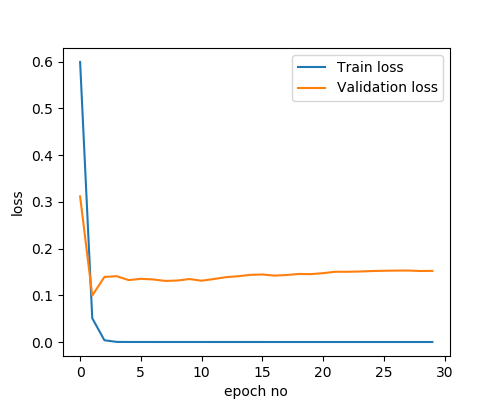

In [11]:
plt.figure(figsize=(5,4))
plt.plot(result.history['loss'],label='Train loss')
plt.plot(result.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


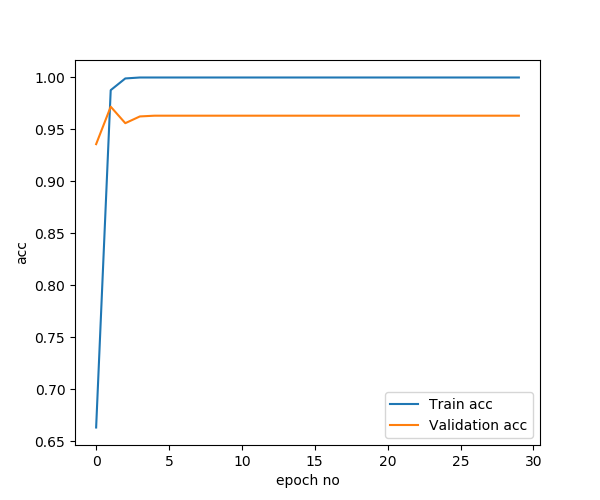

In [12]:

plt.figure(figsize=(6,5))
plt.plot(result.history['acc'],label='Train acc')
plt.plot(result.history['val_acc'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()


In [24]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
}

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])
    
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
def heap_map_confusion_matrix(y_test,y_predict):
  
  confu_matrix=confusion_matrix(y_test, y_predict)
  plt.figure(figsize=(12, 10))
  sns.heatmap(confu_matrix,xticklabels= list(ACTIVITIES.values()), 
                yticklabels=list(ACTIVITIES.values()), 
                annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show() 

In [25]:
graph2 = Graph()
with graph2.as_default():
    session2 = Session()
    with session2.as_default():
        # load model
        model2 = load_model("model_class_dynamic_best_lstm.h5")
        output2 = model2.predict(X_test_dy)
        model2.evaluate(X_test_dy,Y_test_dy)
    session2.close()

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x000000D52D9BD320>>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


1387/1387 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 814us/step


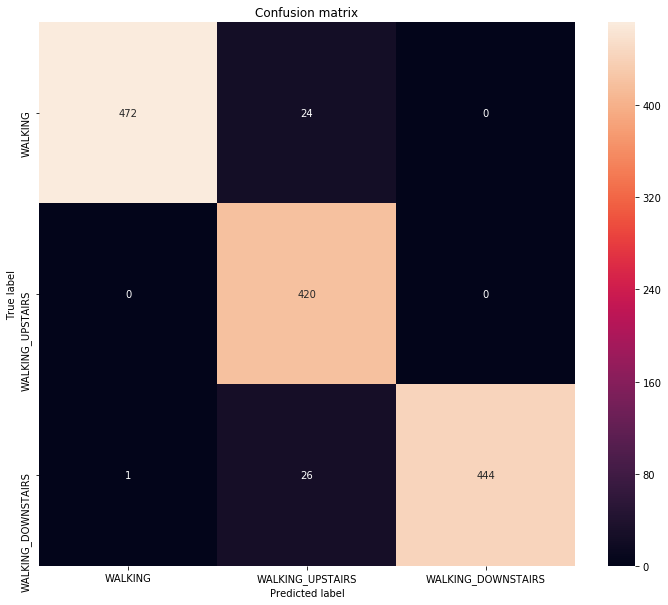

In [26]:
heap_map_confusion_matrix(Y_test_dy,output2)

In [12]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])
    
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
def heap_map_confusion_matrix(y_test,y_predict):
  
  confu_matrix=confusion_matrix(y_test, y_predict)
  plt.figure(figsize=(12, 10))
  sns.heatmap(confu_matrix,xticklabels= list(ACTIVITIES.values()), 
                yticklabels=list(ACTIVITIES.values()), 
                annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show() 

In [4]:
DATADIR = 'UCI_HAR_Dataset'
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return y
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 
    
    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [5]:
def transform(scale, X):
    temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
    temp_X1 = scale.transform(temp_X1)
    return temp_X1.reshape(X.shape)

In [6]:
import numpy as np
import pickle
act = pickle.load(open('act.p','rb'))
static = pickle.load(open('static.p','rb'))
dynamic = pickle.load(open('dynamic.p','rb'))
from keras.models import load_model
from tensorflow import Graph, Session
def predict(X):
    
    temp=transform(act,X)
    graph = Graph()
    with graph.as_default():
        session = Session()
        with session.as_default():
            # load model
            model = load_model("model_class_2_best_lstm.h5")
            output= model.predict(temp)
        session.close()
    prd1=np.argmax(output,axis=1)
    X_st=X[np.where(prd1==1)]
    X_dy=X[np.where(prd1==0)]
    X_st=transform(static,X_st)
    X_dy=transform(dynamic,X_dy)
    graph1 = Graph()
    with graph1.as_default():
        session1 = Session()
        with session1.as_default():
            # load model
            model1 = load_model("model_class_static_best_lstm.h5")
            output1 = model1.predict(X_st)
        session1.close()
    prd2=np.argmax(output1,axis=1)
    prd2=prd2+4
    graph2 = Graph()
    with graph2.as_default():
        session2 = Session()
        with session2.as_default():
            # load model
            model2 = load_model("model_class_dynamic_best_lstm.h5")
            output2 = model2.predict(X_dy)
        session2.close()
    prd3=np.argmax(output2,axis=1)
    prd3=prd3+1
    #merging two list
    final_prd=[]
    i=0
    j=0
    for predection in prd1:
        if predection==1:
            final_prd.append(prd2[i])
            i=i+1
        else:
            final_prd.append(prd3[j])
            j=j+1
    return final_prd       
            

In [7]:
prdict_train=predict(X_train)
prdict_test=predict(X_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [10]:
##accuracy of cnn model
from sklearn.metrics import accuracy_score
print('Accuracy of train data',accuracy_score(Y_train,prdict_train))
print('Accuracy of test data',accuracy_score(Y_test,prdict_test))
Y_test=pd.get_dummies(Y_test).as_matrix()
prdict_test=pd.get_dummies(prdict_test).as_matrix()

Accuracy of train data 0.999183895538629
Accuracy of validation data 0.9579233118425518


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


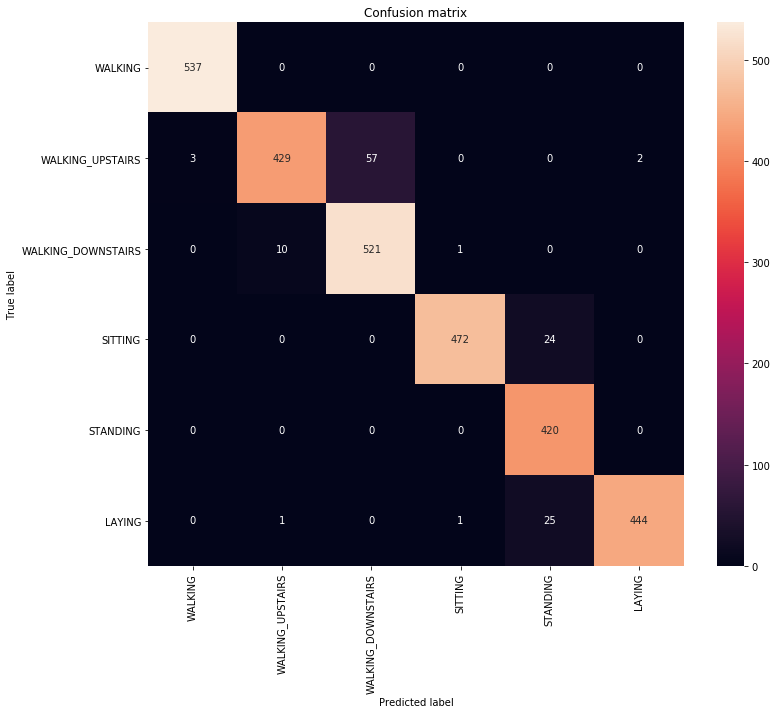

In [13]:
heap_map_confusion_matrix(Y_test,prdict_test)

Accuracy of train data 0.999183895538629<br>
Accuracy of test data 0.9579233118425518